In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_path = './insurance.csv'

In [3]:
insurance_df = pd.read_csv(file_path)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


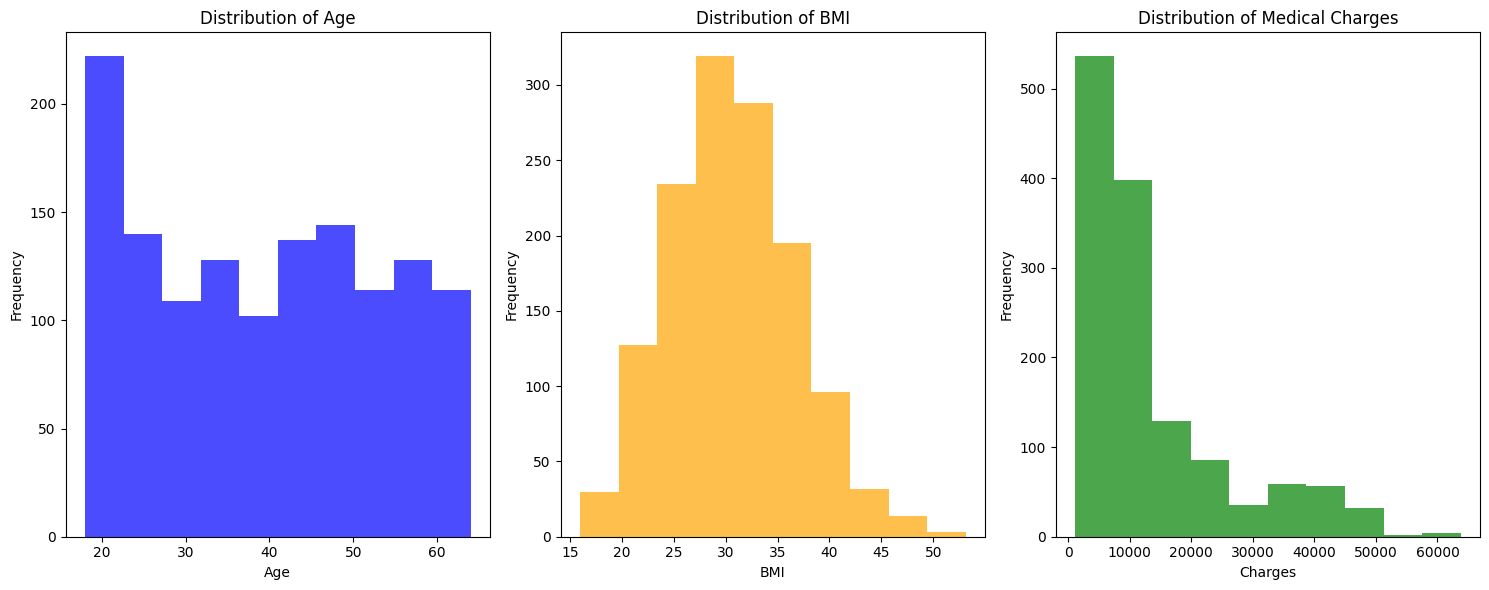

In [5]:
# Plotting distributions of age, BMI, and medical charges in a single figure
plt.figure(figsize=(15, 6))

# Age distribution
plt.subplot(1, 3, 1)
plt.hist(insurance_df['age'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# BMI distribution
plt.subplot(1, 3, 2)
plt.hist(insurance_df['bmi'], bins=10, color='orange', alpha=0.7)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Medical charges distribution
plt.subplot(1, 3, 3)
plt.hist(insurance_df['charges'], bins=10, color='green', alpha=0.7)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


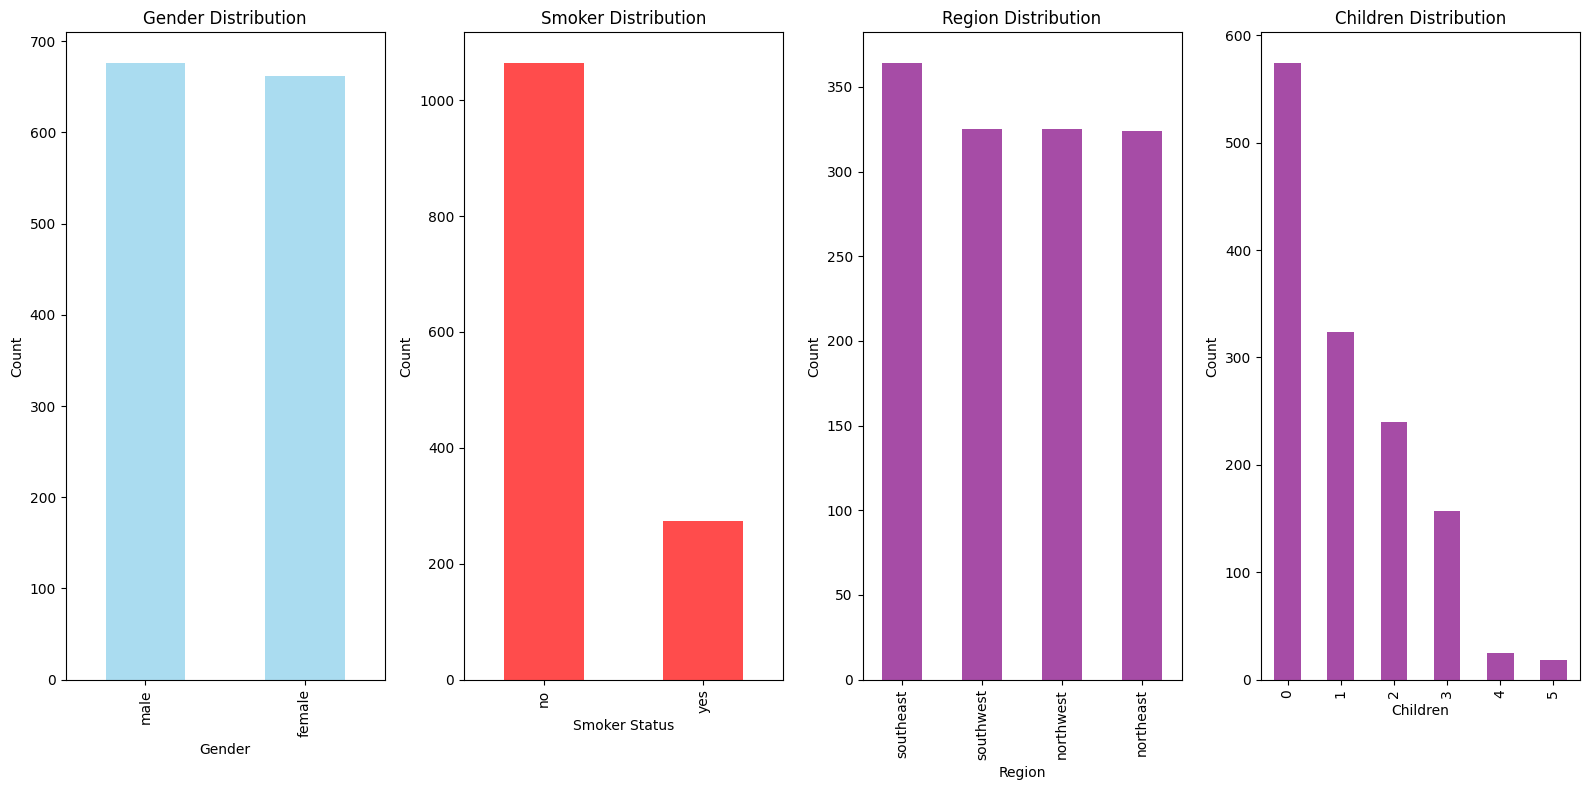

In [6]:
# Plotting bar charts for categorical variables: 'sex', 'smoker', and 'region'
plt.figure(figsize=(16, 8))

# Gender distribution
plt.subplot(1, 4, 1)
insurance_df['sex'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Smoker distribution
plt.subplot(1, 4, 2)
insurance_df['smoker'].value_counts().plot(kind='bar', color='red', alpha=0.7)
plt.title('Smoker Distribution')
plt.xlabel('Smoker Status')
plt.ylabel('Count')

# Region distribution
plt.subplot(1, 4, 3)
insurance_df['region'].value_counts().plot(kind='bar', color='purple', alpha=0.7)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')

# Children distribution
plt.subplot(1, 4, 4)
insurance_df['children'].value_counts().plot(kind='bar', color='purple', alpha=0.7)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


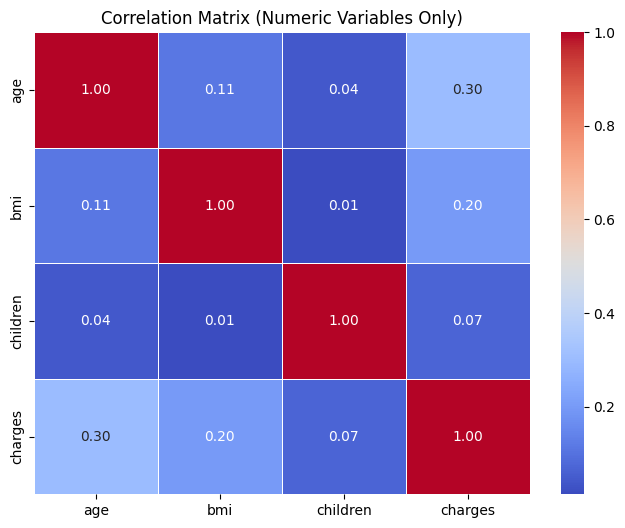

In [7]:
# Correlation matrix for only numeric variables
numeric_columns = insurance_df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Numeric Variables Only)')
plt.show()



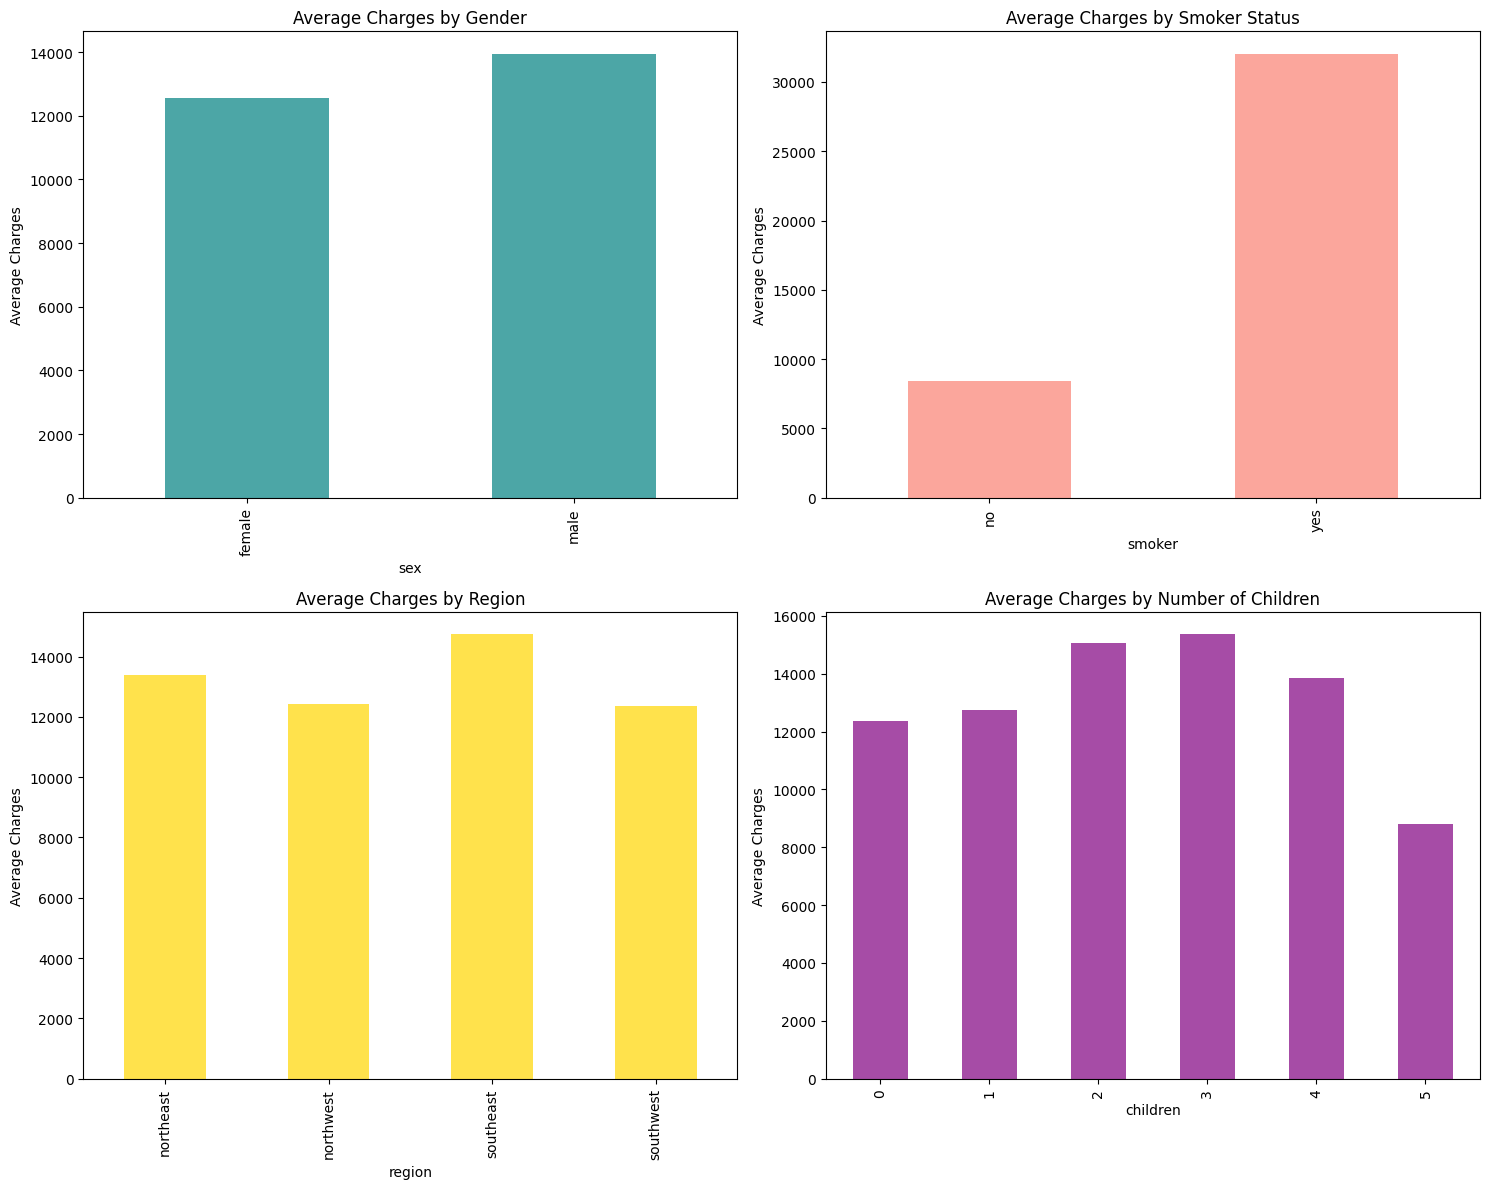

In [8]:
# Plotting Average Charges by Gender, Smoker Status, Region, and Number of Children in one figure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gender vs charges
insurance_df.groupby('sex')['charges'].mean().plot(
    kind='bar', color='teal', alpha=0.7, ax=axes[0, 0]
)
axes[0, 0].set_title('Average Charges by Gender')
axes[0, 0].set_ylabel('Average Charges')

# Smoker vs charges
insurance_df.groupby('smoker')['charges'].mean().plot(
    kind='bar', color='salmon', alpha=0.7, ax=axes[0, 1]
)
axes[0, 1].set_title('Average Charges by Smoker Status')
axes[0, 1].set_ylabel('Average Charges')

# Region vs charges
insurance_df.groupby('region')['charges'].mean().plot(
    kind='bar', color='gold', alpha=0.7, ax=axes[1, 0]
)
axes[1, 0].set_title('Average Charges by Region')
axes[1, 0].set_ylabel('Average Charges')

# Children vs charges
insurance_df.groupby('children')['charges'].mean().plot(
    kind='bar', color='purple', alpha=0.7, ax=axes[1, 1]
)
axes[1, 1].set_title('Average Charges by Number of Children')
axes[1, 1].set_ylabel('Average Charges')

plt.tight_layout()
plt.show()

In [9]:
# Convert categorical variables into numerical

# Male - 0, Female - 1
# Northeast - 0, Northwest - 1, Southeast - 2, Southwest - 3
# Smoker (No) - 0, Smoker (Yes) - 1
insurance_df['sex'] = insurance_df['sex'].map({'male': 0, 'female': 1})
insurance_df['region'] = insurance_df['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})
insurance_df['smoker'] = insurance_df['smoker'].map({'no': 0, 'yes': 1})

In [10]:
# Round charges to nearest integer
insurance_df['charges'] = insurance_df['charges'].round()

In [11]:
def create_group_fn(feature_index, feature_value):
    def group_fn(row):
        return row[feature_index] == feature_value

    return group_fn

gender_groups = list()
num_gender_groups = 0

list_of_genders = [0, 1]
for i in list_of_genders:
    curr_group = create_group_fn(1, i)
    gender_groups.append(curr_group)
    num_gender_groups += 1

region_groups = list()
num_region_groups = 0

list_of_regions = [0, 1, 2, 3]
for i in list_of_regions:
    curr_group = create_group_fn(5, i)
    region_groups.append(curr_group)
    num_region_groups += 1

total_groups = gender_groups + region_groups
num_groups = num_gender_groups + num_region_groups

group_fn = lambda row: [group(row) for group in total_groups]

In [12]:
features_df = insurance_df.drop(columns=['charges'])
features = features_df.to_numpy()
target_df = insurance_df['charges']
target = target_df.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)
training_set_size, num_features = np.shape(X_train)

In [13]:
# Calculate calibration set size and derive training set size
calibration_set_size = round(0.25 * training_set_size)  # Round to nearest integer
new_train_set_size = training_set_size - calibration_set_size

# Perform the slicing
X_train_final = X_train[:new_train_set_size]
X_calib = X_train[new_train_set_size:]
y_train_final = y_train[:new_train_set_size]
y_calib = y_train[new_train_set_size:]

# Print shapes to verify
print("Shape of X_train_final:", X_train_final.shape)  # Should be (802, 6) or adjusted value
print("Shape of X_calib:", X_calib.shape)  # Should be consistent with (267, 6) or adjusted value
print("Shape of y_train_final:", y_train_final.shape)
print("Shape of y_calib:", y_calib.shape)

Shape of X_train_final: (802, 6)
Shape of X_calib: (268, 6)
Shape of y_train_final: (802,)
Shape of y_calib: (268,)


In [14]:
# Train point predictor (Linear Regression)
random_forest_regression = RandomForestRegressor()
random_forest_regression.fit(X_train_final, y_train_final)

RandomForestRegressor()

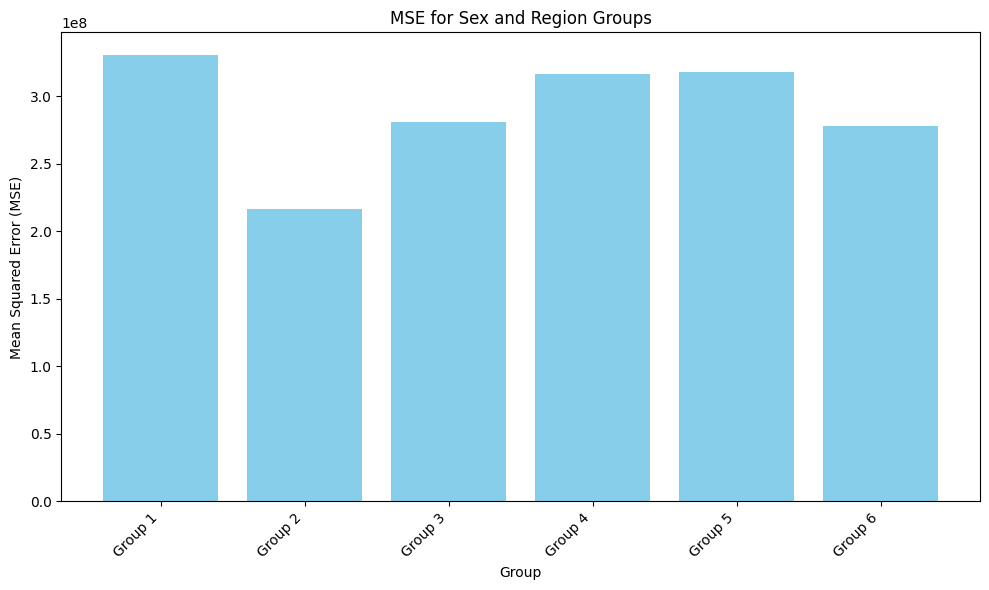

In [15]:
# Define individual groups using proper column indexing for NumPy arrays
individual_groups = {
    'Group 1' : X_test[X_test[:, 1] == 0],
    'Group 2': X_test[X_test[:, 1] == 1],
    'Group 3': X_test[X_test[:, 5] == 0],
    'Group 4': X_test[X_test[:, 5] == 1],
    'Group 5': X_test[X_test[:, 5] == 2],
    'Group 6': X_test[X_test[:, 5] == 3]
}

# Initialize dictionaries to store MSE and R^2 values for each group
individual_mse = {}

# Calculate MSE and R^2 for each individual group
for group_name, group_data in individual_groups.items():
    if group_data.shape[0] > 0:  # Check if the group is not empty
        # Predict using the group data
        y_pred = random_forest_regression.predict(group_data)
        # Use the first `n` values of `y_test`, where `n` is the size of the group
        y_true = y_test[:group_data.shape[0]]
        
        mse = mean_squared_error(y_true, y_pred)
        
        individual_mse[group_name] = mse

# Plot the MSE values for each individual group
plt.figure(figsize=(10, 6))
plt.bar(individual_mse.keys(), individual_mse.values(), color='skyblue')
plt.xlabel('Group')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Sex and Region Groups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

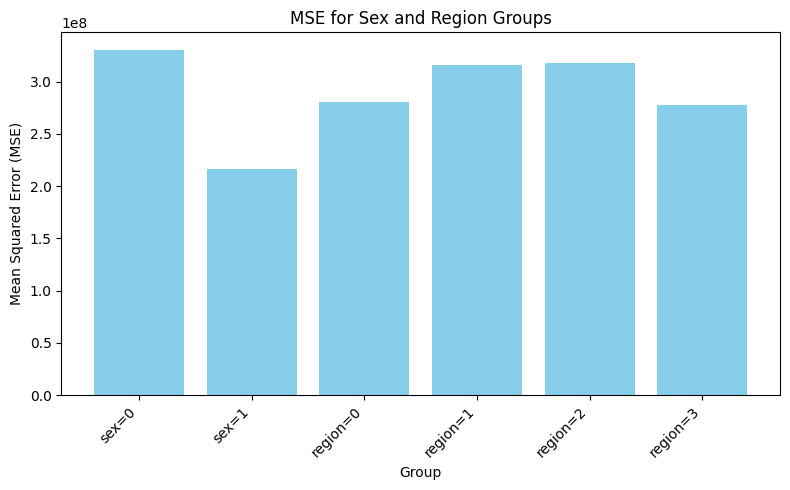

In [16]:
# Define individual groups using proper column indexing for NumPy arrays
individual_groups = {
    'sex=0': X_test[X_test[:, 1] == 0],
    'sex=1': X_test[X_test[:, 1] == 1],
    'region=0': X_test[X_test[:, 5] == 0],
    'region=1': X_test[X_test[:, 5] == 1],
    'region=2': X_test[X_test[:, 5] == 2],
    'region=3': X_test[X_test[:, 5] == 3]
}

# Initialize an empty dictionary to store MSE values for each group
individual_mse = {}

# Calculate MSE for each individual group
for group_name, group_data in individual_groups.items():
    if group_data.shape[0] > 0:  # Check if the group is not empty
        # Predict using the group data
        y_pred = random_forest_regression.predict(group_data)
        # Use the first `n` values of `y_test`, where `n` is the size of the group
        mse = mean_squared_error(y_test[:group_data.shape[0]], y_pred)
        individual_mse[group_name] = mse

# Plot the MSE values for each individual group
plt.figure(figsize=(8, 5))
plt.bar(individual_mse.keys(), individual_mse.values(), color='skyblue')
plt.xlabel('Group')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Sex and Region Groups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
# Convert y_calib values into threshold values in order to train for conformal prediction 
from utils.CalibrationScorer import customResidualCalibrationScorer

mult_factor = 800000 # Set to value which ensures majority of threshold values are within [0, 1]
residualCalibrationScorer = customResidualCalibrationScorer(mult_factor)
residualCalibrationScorer.update(random_forest_regression.predict)

# These are the scores which we want to achieve threshold-calibration with respect to
w_calib = np.array([residualCalibrationScorer.calc_score(X_calib[i:i+1], y_calib[i]) for i in range(calibration_set_size)])

# Checking if values in w_calib are outside desired range.
for val in w_calib:
    if val < 0 or val > 1:
        print(val)
print(min(w_calib), max(w_calib))

w_test = np.array([residualCalibrationScorer.calc_score(X_test[i:i+1], y_test[i]) for i in range(len(y_test))])

[4.0375e-06] [0.02833654]


In [18]:
from utils.MultiValidCoverage import *

# Parameters for our uncertainty quantification:
tau = 0.9
delta = 1 - tau
num_grid = 300

patches = multivalid_coverage(tau=tau, x_train=X_calib, y_train=w_calib, num_grid=num_grid, group_fn=group_fn)
multivalid_model = lambda x: eval_fn(x, patches=patches, num_grid=num_grid, group_fn=group_fn)


Max violation in round 0  :  21.760000000000005
Update: (np.int64(0), np.int64(0), 3)
Max violation in round 1  :  18.041212121212126
Update: (np.int64(1), np.int64(0), 1)
Max violation in round 2  :  1.241212121212123


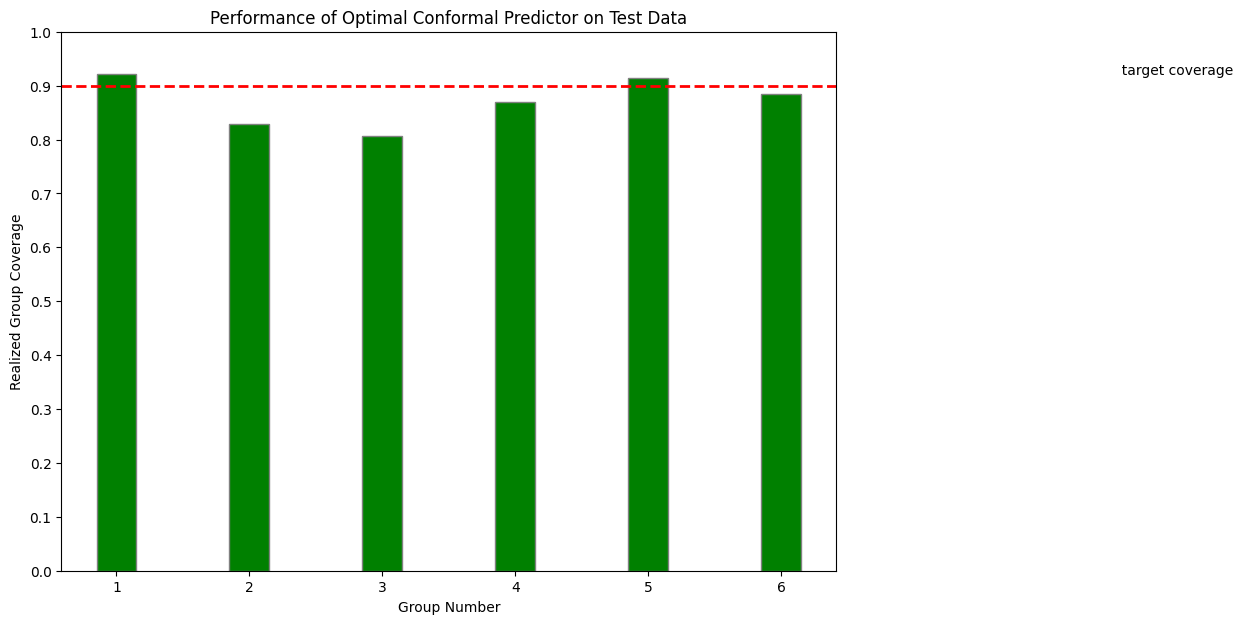

Coverage on group 1 : 0.921875
Coverage on group 2 : 0.8285714285714286
Coverage on group 3 : 0.8070175438596491
Coverage on group 4 : 0.8695652173913043
Coverage on group 5 : 0.9135802469135802
Coverage on group 6 : 0.8852459016393442


In [19]:
# Plot results
from utils.MultiValidPlotting import plot_group_coverage, plot_pred_set_size

plot_group_coverage(model=multivalid_model, tau=tau, x_test=X_test, y_test=w_test, num_groups=num_groups, group_fn=group_fn, multivalid=False, verbose=True)

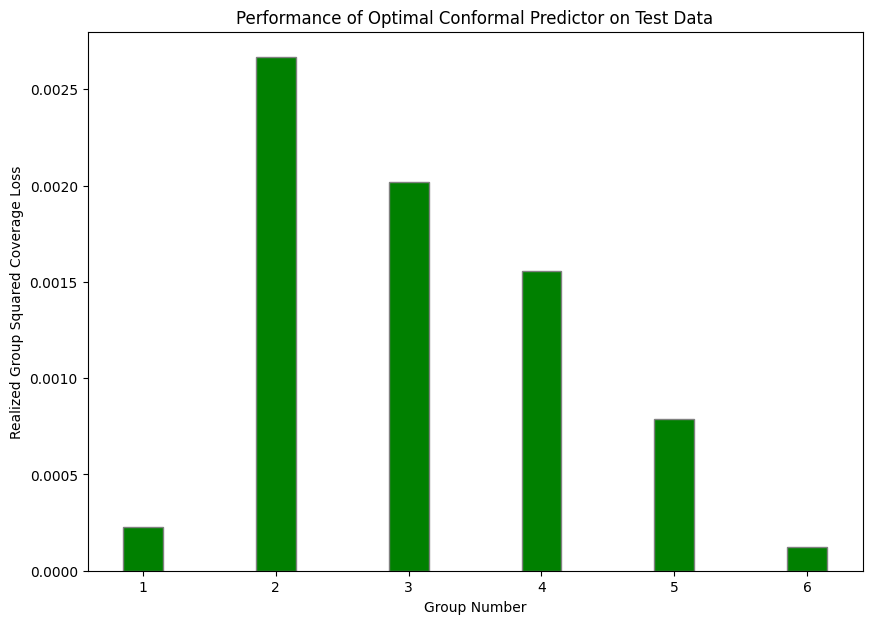

Performance on group 1 : 0.0002285447761194025
Performance on group 2 : 0.002665245202558633
Performance on group 3 : 0.0020195895522388072
Performance on group 4 : 0.0015553493712119196
Performance on group 5 : 0.0007882172986001678
Performance on group 6 : 0.0001255817685764724


In [20]:
plot_group_coverage(model=multivalid_model, tau=tau, x_test=X_test, y_test=w_test, num_groups=num_groups, group_fn=group_fn, multivalid=True, verbose=True)

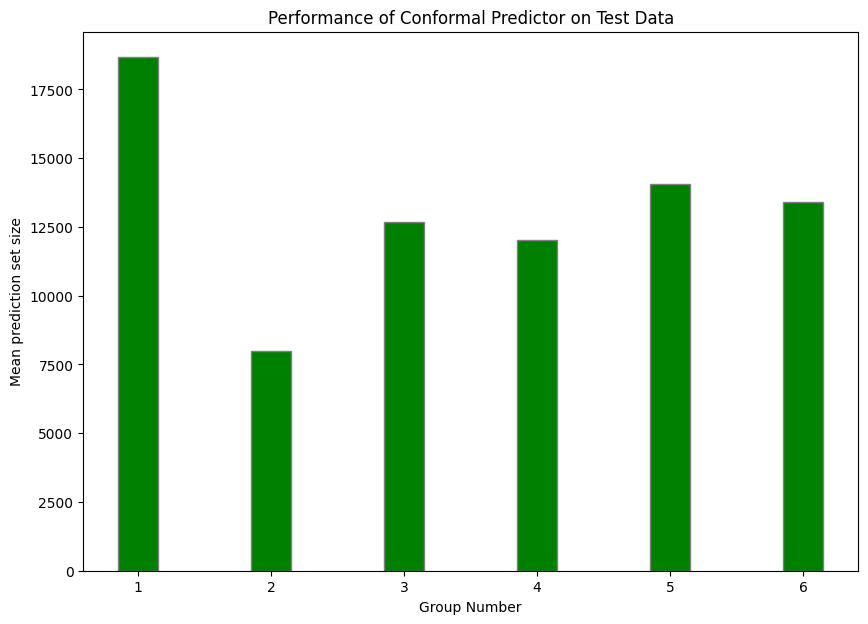

Average prediction set size on group 1 : 18666.666666666675
Average prediction set size on group 2 : 8000.0
Average prediction set size on group 3 : 12678.362573099415
Average prediction set size on group 4 : 12019.32367149758
Average prediction set size on group 5 : 14057.613168724274
Average prediction set size on group 6 : 13420.765027322403


In [21]:
plot_pred_set_size(model=multivalid_model, tau=tau, x_test=X_test, y_test=w_test, num_groups=num_groups, group_fn=group_fn, mult_width = mult_factor, multivalid=True, verbose=True)